In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
import models 
from matplotlib import pyplot as plt

In [8]:
def plot_instance(instance_id):
    print('\nExample: ')
    print(train_loader.dataset.texts[instance_id])
    print('\nLabel Number: ')
    print(train_loader.dataset.labels[instance_id])
    print('\nLabel String: ')
    print(classes[train_loader.dataset.labels[instance_id]])

In [9]:
classes = [
'World',
'Sports',
'Business',
'Sci/Tech',
]

In [10]:
data_path = './agnews/'
batch_size = 32
device_name = 'cuda'
nb_epochs = 5
log_interval = 250
lr = 1e-3
nb_epochs = 10

device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size: ', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Test size : ', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(5000)
plot_instance(1238)
plot_instance(8723)


Train size:  112400 112400
Test size :  7600 7600

Example: 
Computer Q amp;A: Tips on installing Windows XP SP2. It seems that Microsoft #39;s new upgrade to Windows is making some people nervous. That #39;s not surprising, as home and office computing environments are just not as friendly as they used to be due to viruses and spyware. Even the software we ...

Label Number: 
3

Label String: 
Sci/Tech

Example: 
Ace performance by Thailand #39;s Thongchai at Mount Juliet. Thailand #39;s Thongchai Jaidee aced the 165-yard 11th hole in the WGC-American Express Championship second round on Friday. The 34-year-old former paratrooper used an eight 

Label Number: 
1

Label String: 
Sports

Example: 
Office Depot Won #39;t Meet Analysts #39; Earnings Estimates for 3 Qtr. Office Depot Inc., the world #39;s No. 2 office-supplies retailer, said it expects earnings per share for the third quarter to fall below current First Call estimates partly because of the recent Hurricanes in Florida.

La

In [13]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=97585, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.LSTM(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
        )
        self.fc = nn.Linear(32*2, 4)
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc(vector)
        return x


In [14]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

Passed


In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3,)

In [16]:
history = train(
    model=model, train_loader=train_loader, 
    test_loader=valid_loader, device=device, optimizer=optimizer, 
    lr_scheduler=lr_scheduler, nb_epochs=nb_epochs,
    log_interval=100
)


* * * Training * * *
Train Epoch:   1 [     0/112400 (0%)]	Loss: 1.406300
Train Epoch:   1 [  3200/112400 (3%)]	Loss: 1.286977
Train Epoch:   1 [  6400/112400 (6%)]	Loss: 0.870774
Train Epoch:   1 [  9600/112400 (9%)]	Loss: 0.807858
Train Epoch:   1 [ 12800/112400 (11%)]	Loss: 0.675487
Train Epoch:   1 [ 16000/112400 (14%)]	Loss: 0.400360
Train Epoch:   1 [ 19200/112400 (17%)]	Loss: 0.405062
Train Epoch:   1 [ 22400/112400 (20%)]	Loss: 0.305554
Train Epoch:   1 [ 25600/112400 (23%)]	Loss: 0.290201
Train Epoch:   1 [ 28800/112400 (26%)]	Loss: 0.213719
Train Epoch:   1 [ 32000/112400 (28%)]	Loss: 0.387615
Train Epoch:   1 [ 35200/112400 (31%)]	Loss: 0.685348
Train Epoch:   1 [ 38400/112400 (34%)]	Loss: 0.560981
Train Epoch:   1 [ 41600/112400 (37%)]	Loss: 0.396611
Train Epoch:   1 [ 44800/112400 (40%)]	Loss: 0.423703
Train Epoch:   1 [ 48000/112400 (43%)]	Loss: 0.203353
Train Epoch:   1 [ 51200/112400 (46%)]	Loss: 0.562120
Train Epoch:   1 [ 54400/112400 (48%)]	Loss: 0.245516
Train Epoc

Train Epoch:   5 [     0/112400 (0%)]	Loss: 0.036633
Train Epoch:   5 [  3200/112400 (3%)]	Loss: 0.156519
Train Epoch:   5 [  6400/112400 (6%)]	Loss: 0.225281
Train Epoch:   5 [  9600/112400 (9%)]	Loss: 0.134121
Train Epoch:   5 [ 12800/112400 (11%)]	Loss: 0.135467
Train Epoch:   5 [ 16000/112400 (14%)]	Loss: 0.102825
Train Epoch:   5 [ 19200/112400 (17%)]	Loss: 0.048322
Train Epoch:   5 [ 22400/112400 (20%)]	Loss: 0.220578
Train Epoch:   5 [ 25600/112400 (23%)]	Loss: 0.366287
Train Epoch:   5 [ 28800/112400 (26%)]	Loss: 0.253965
Train Epoch:   5 [ 32000/112400 (28%)]	Loss: 0.198998
Train Epoch:   5 [ 35200/112400 (31%)]	Loss: 0.172625
Train Epoch:   5 [ 38400/112400 (34%)]	Loss: 0.027936
Train Epoch:   5 [ 41600/112400 (37%)]	Loss: 0.024021
Train Epoch:   5 [ 44800/112400 (40%)]	Loss: 0.127496
Train Epoch:   5 [ 48000/112400 (43%)]	Loss: 0.166297
Train Epoch:   5 [ 51200/112400 (46%)]	Loss: 0.219361
Train Epoch:   5 [ 54400/112400 (48%)]	Loss: 0.079055
Train Epoch:   5 [ 57600/112400 

Train Epoch:   9 [     0/112400 (0%)]	Loss: 0.089029
Train Epoch:   9 [  3200/112400 (3%)]	Loss: 0.154631
Train Epoch:   9 [  6400/112400 (6%)]	Loss: 0.056881
Train Epoch:   9 [  9600/112400 (9%)]	Loss: 0.081343
Train Epoch:   9 [ 12800/112400 (11%)]	Loss: 0.042936
Train Epoch:   9 [ 16000/112400 (14%)]	Loss: 0.111349
Train Epoch:   9 [ 19200/112400 (17%)]	Loss: 0.076311
Train Epoch:   9 [ 22400/112400 (20%)]	Loss: 0.221347
Train Epoch:   9 [ 25600/112400 (23%)]	Loss: 0.108474
Train Epoch:   9 [ 28800/112400 (26%)]	Loss: 0.108310
Train Epoch:   9 [ 32000/112400 (28%)]	Loss: 0.112261
Train Epoch:   9 [ 35200/112400 (31%)]	Loss: 0.038013
Train Epoch:   9 [ 38400/112400 (34%)]	Loss: 0.015531
Train Epoch:   9 [ 41600/112400 (37%)]	Loss: 0.203098
Train Epoch:   9 [ 44800/112400 (40%)]	Loss: 0.053251
Train Epoch:   9 [ 48000/112400 (43%)]	Loss: 0.044552
Train Epoch:   9 [ 51200/112400 (46%)]	Loss: 0.115233
Train Epoch:   9 [ 54400/112400 (48%)]	Loss: 0.238235
Train Epoch:   9 [ 57600/112400 

In [17]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 92.20%


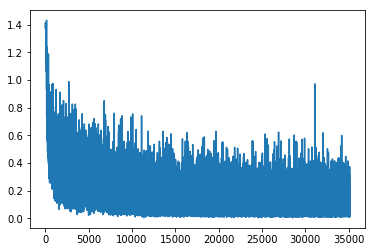

In [18]:
plt.plot(history['train_loss'])

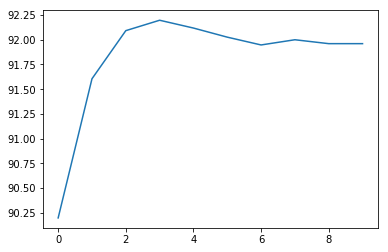

In [19]:
plt.plot(history['val_acc'])

In [20]:
test_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['test'],
)[0]

In [21]:
test(model, device, test_loader)

Test set: Average loss: 0.0090, Accuracy: 6912/7600 (90.95%)



90.94736842105263

## Implemente uma rede para classificar texto usando convoluções

In [ ]:
class ConvText(nn.Module):
    def __init__(self, num_embeddings=97585, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(ConvText, self).__init__()        
        
    def forward(self, x, lengths):      
        return x

In [ ]:
model = ConvText()
model = model.to(device)

dummy_pred = check_input(model, device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3,)

In [ ]:
history = train(
    model=model, train_loader=train_loader, 
    test_loader=valid_loader, device=device, optimizer=optimizer, 
    lr_scheduler=lr_scheduler, nb_epochs=nb_epochs,
    log_interval=100
)

## Implemente uma rede para classificar texto que simplesmente faz a média dos embeddings

In [ ]:
class FastText(nn.Module):
    def __init__(self, num_embeddings=97585, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(FastText, self).__init__()        
        
    def forward(self, x, lengths):      
        return x

In [ ]:
model = FastText()
model = model.to(device)

dummy_pred = check_input(model, device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3,)

In [ ]:
history = train(
    model=model, train_loader=train_loader, 
    test_loader=valid_loader, device=device, optimizer=optimizer, 
    lr_scheduler=lr_scheduler, nb_epochs=nb_epochs,
    log_interval=100
)